<h1><center> <font color='blue'> Popular Data Science Questions </font> </center></h1>

***by Susan Fisher***

The goal of this project is to find the most popular data science questions.  Finding the most common data science questions could be helpful for a company that creates data science content.  The content could be for books, online articles, videos or interactive text-based platforms.  

Stack Overflow is a question and answer website about programming.  Stack Exchange is a network of question and answer websites by topic.  Focus on this project will be on the Data Science Stack Exchange (DSSE), https://datascience.stackexchange.com/. The DSSE home page contains a list of questions, list of tags, list of users, and a list of unanswered questions.    

Stack Exchange provides a public database for each of its websites, Stack Exchange Data Explorer (SEDE).  The DSSE data can be queried and downloaded here, https://data.stackexchange.com/datascience/query/new.  Some of the most popular Stack Exchange sites are shown in the following image.

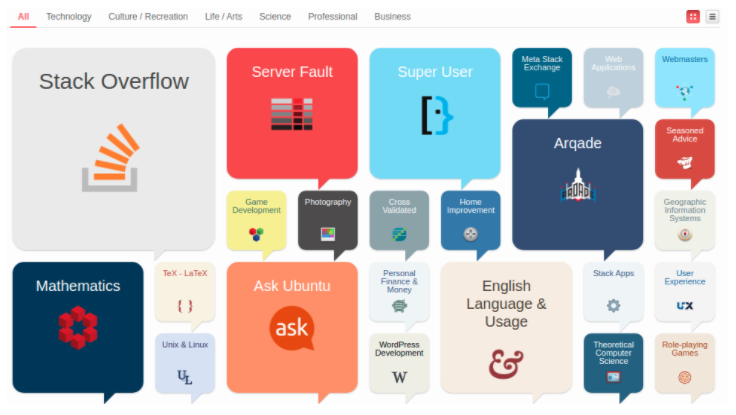

In [3]:
from IPython.display import Image

Image(filename="4.4_StackExchangeSites.png", height=600, width=400)

The first part of this project will look at 2019 posts for the most common tags.  Each "Id" or row of the dataset represents a question, and the tags are keywords or labels that categorize questions.  Deep learning is one of the most common tags.  The generated horizontal bar plots will show general differences in the popularity of the top ten tags.

The second part will look at whether deep learning is a passing fad or if it is a topic that will be around for some time.  The entire dataset will be used for this analysis.  Superimposed bar plots and line plot will be generated.

**Retrieving the data -  2019 questions**

From the Data Science Stack Exchange's database, this SQL query retrieves all question tags from 2019 in the 'Posts' table:

    SELECT Id, CreationDate,
        Score, ViewCount, Tags,
        AnswerCount, FavoriteCount
    FROM posts
    WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019;

In [1]:
# Read in the csv file as a dataframe, "q_2019."

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

q_2019 = pd.read_csv('C:/Users/Name/Documents/PythonScripts/DataSets/2019_questions.csv', parse_dates=['CreationDate'])

## <font color='blue'> DATA EXPLORATION - 2019 questions </font>

In [2]:
q_2019.head(2)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,54873,2019-07-01 19:58:09,5,2129,<python><scikit-learn><unsupervised-learning><...,1,NaN
1,54877,2019-07-01 21:59:22,2,339,<machine-learning><neural-network><deep-learni...,3,2.0


In [3]:
q_2019.shape

(6871, 7)

In [4]:
q_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6871 entries, 0 to 6870
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             6871 non-null   int64         
 1   CreationDate   6871 non-null   datetime64[ns]
 2   Score          6871 non-null   int64         
 3   ViewCount      6871 non-null   int64         
 4   Tags           6871 non-null   object        
 5   AnswerCount    6871 non-null   int64         
 6   FavoriteCount  1555 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 375.9+ KB


## <font color='blue'> DATA CLEANING - 2019 questions </font>

The following data cleaning is needed before analysis:  

- "FavoriteCount" has a lot of missing values, 5,316 are missing out of 6871.  The missing values will be replaced with "0," and the type changed to integer.

- The "Tags" column needs to have "<," and ">" removed, and converted to a list of strings.

In [5]:
# "FavoriteCount" column: replace missing values with '0,' and change to integer type

q_2019['FavoriteCount'] = q_2019['FavoriteCount'].fillna(0).astype(int)

#Verify no null values and the column type
print(q_2019['FavoriteCount'].isnull().sum())
print(q_2019['FavoriteCount'].dtype)

0
int32


In [6]:
# "Tags" column: remove "<," and ">," and split strings into list of strings
# View some rows before cleaning.

q_2019['Tags'].head(10)

0    <python><scikit-learn><unsupervised-learning><...
1    <machine-learning><neural-network><deep-learni...
2                         <anomaly-detection><outlier>
3    <machine-learning><statistics><data-science-mo...
4                            <orange><opencv><orange3>
5    <keras><computer-vision><image-preprocessing><...
6                    <deep-learning><tensorflow><bert>
7                                <python><forecasting>
8    <machine-learning><python><pandas><data-scienc...
9       <machine-learning><python><nlp><data-cleaning>
Name: Tags, dtype: object

In [7]:
# "Tags" column: remove "<," and ">," and split strings into list of strings

q_2019['Tags'] = q_2019['Tags'].str.replace("^<|>$",'').str.split('><')

# View some rows to verify cleaning.
q_2019['Tags'].head(10)

0    [python, scikit-learn, unsupervised-learning, ...
1    [machine-learning, neural-network, deep-learni...
2                         [anomaly-detection, outlier]
3    [machine-learning, statistics, data-science-mo...
4                            [orange, opencv, orange3]
5    [keras, computer-vision, image-preprocessing, ...
6                    [deep-learning, tensorflow, bert]
7                                [python, forecasting]
8    [machine-learning, python, pandas, data-scienc...
9       [machine-learning, python, nlp, data-cleaning]
Name: Tags, dtype: object

## <font color='blue'> DATA ANALYSIS - most popular tags </font>

In order to find the most popular data science question categories on the Stack Exchange
1) The most common tags will be found, by counting the tags in the dataset.
2) The most common tags based on the number of views for the question, "ViewCount" column, will be computed.
    - And the tags that are in (2), but not in (1) will be found.

**Data Analysis - (1) count tags**

In [8]:
# Create dictionary of tags.  Keys are tags, and values are the counts of the tags.

tag_count = {}
for row in q_2019['Tags']:
    for tag in row:      
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1 

type(tag_count)

dict

In [9]:
# Convert dictionary, tag_count, to a dataframe, tag_count_df.
# The dataframe, tag_count_df, index column contains the tags. 

# First, convert dictionary to series.
tag_count_s = pd.Series(tag_count).sort_values(ascending=False)

# Then convert series to dataframe.
tag_count_df = pd.DataFrame(tag_count_s, columns=['TagCount'])

print(tag_count_df.shape)
print(tag_count_df.head(10))

(496, 1)
                  TagCount
machine-learning      2153
python                1465
deep-learning          903
neural-network         830
keras                  715
classification         583
scikit-learn           449
tensorflow             422
nlp                    397
cnn                    381


In [10]:
# Top 10 Tags
most_used = tag_count_df.head(10).sort_values('TagCount', ascending=True)
most_used

,TagCount
cnn,381
nlp,397
tensorflow,422
scikit-learn,449
classification,583
keras,715
neural-network,830
deep-learning,903
python,1465
machine-learning,2153


**Horizontal Bar Plot of most used tags**

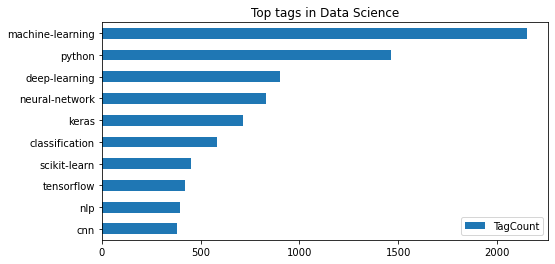

In [11]:
most_used.plot(kind='barh', 
              title='Top tags in Data Science',
             figsize=(8,4))

**Data Analysis - (2) "ViewCount" of each tag**

In [12]:
# Create dictionary, view_count, of the tags and counts the "ViewCount."

view_count = {}
for index, row in q_2019.iterrows():
    for tag in row['Tags']:      
        if tag in view_count:
            view_count[tag] += row['ViewCount']
        else:
            view_count[tag] = row['ViewCount']

# Convert dictionary, view_count, to a series, then to a dataframe.
view_count_s = pd.Series(view_count).sort_values(ascending=False)
view_count_df = pd.DataFrame(view_count_s, columns=['ViewCount'])
most_viewed = view_count_df.head(10).sort_values('ViewCount', ascending=True)
most_viewed

,ViewCount
dataframe,283428
classification,296666
tensorflow,352929
scikit-learn,390947
neural-network,517541
deep-learning,606036
keras,712864
pandas,750315
machine-learning,1061220
python,1638393


**Horizontal Bar Plot of most viewed tags**

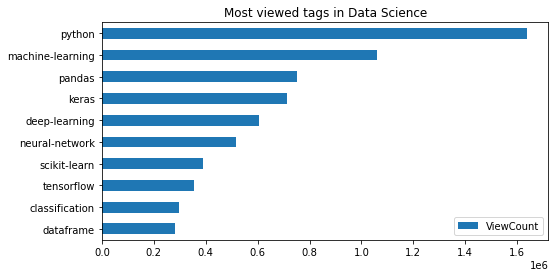

In [13]:
# Horizontal bar plot of of most_viewed tags.

most_viewed.plot(kind='barh', 
              title='Most viewed tags in Data Science',
             figsize=(8,4))

**Side by side bar plots**  

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002331869F100>],
      dtype=object)

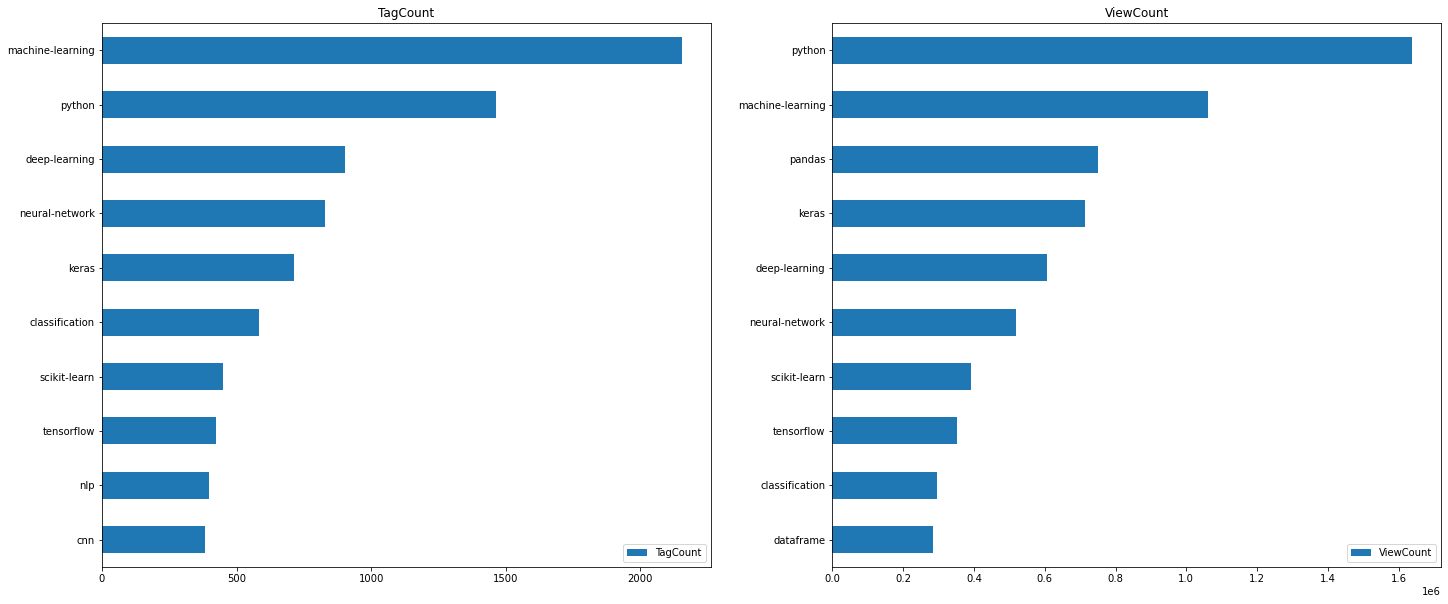

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))
most_used.plot(kind="barh", ax=axes[0], subplots=True)
most_viewed.plot(kind="barh", ax=axes[1], subplots=True)

**Analysis**  

When tags were counted, the five most common tags in the questions were machine learning, python, deep learning, neural network, and keras.  When the "ViewCount" was counted for each tag, the five most common tags were python, machine-learning, pandas, keras, and deep learning.  The top five tags are similar for both.  

Though, "ViewCount" is the count of the number of views by tag, it is a better indicator of the popularity of a topic.  

## <font color='blue'> DATA ANALYSIS - is Deep Learning just a Fad? </font>

The second part of this project will look at whether one of the most common tags, deep learning, is a topic that is timeless or just a passing fad.  A larger dataset that spans over more than one year will be needed, so the entire dataset will be downloaded from the Data Science Stack Exchange.  The data will be cleaned, and then it will be separated by quarters to view interest in deep learning over time.  

**Getting the data - all questions**

From the Data Science Stack Exchange's database, this SQL query retrieves all question tags from the 'Posts' table:

    SELECT Id, CreationDate, Tags
      FROM posts
     WHERE PostTypeId = 1;

In [15]:
# Read in the csv file as a dataframe, "all_q."
# Convert "CreationDate" column to datetime type.

all_q = pd.read_csv('C:/Users/Name/Documents/Python Scripts/DataSets/all_questions.csv', parse_dates=['CreationDate'])

### DATA EXPLORATION - all questions

In [16]:
all_q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26279 entries, 0 to 26278
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            26279 non-null  int64         
 1   CreationDate  26279 non-null  datetime64[ns]
 2   Tags          26279 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 616.0+ KB


In [17]:
all_q.head()

,Id,CreationDate,Tags
0,24038,2017-10-24 12:33:54,<classification><preprocessing><normalization>
1,24041,2017-10-24 13:37:18,<preprocessing><normalization>
2,24047,2017-10-24 19:32:54,<nlp><sentiment-analysis>
3,24052,2017-10-25 02:43:49,<python><r><pandas><data><data.table>
4,24054,2017-10-25 06:41:40,<clustering><feature-selection><feature-engine...


### DATA CLEANING - all questions

Just as with the 2019 questions cleaning, the "Tags" column requires the same cleaning:

- The "Tags" column needs to have "<," and ">" removed, and converted to a list of strings.

In [18]:
# Clean the "Tags" column.

all_q['Tags'] = all_q['Tags'].str.replace("^<|>$",'').str.split('><')
all_q['Tags'].head()

0       [classification, preprocessing, normalization]
1                       [preprocessing, normalization]
2                            [nlp, sentiment-analysis]
3                [python, r, pandas, data, data.table]
4    [clustering, feature-selection, feature-engine...
Name: Tags, dtype: object

### DATA ANALYSIS - all questions



To view the interest in deep learning questions over time, the analysis will divide the data by quarters from 7-1-2014 to 9-30-2020.  
Then for each quarter, the following will be computer:
- Total deep learning tags per quarter
- Total questions per quarter
- Rate of deep learning questions per quarter

In [19]:
# View beginning and ending time frame of the data.

print(all_q['CreationDate'].min())
print(all_q['CreationDate'].max())

2014-05-13 23:58:30
2020-12-06 03:01:58


For a calendar year, the quarters are as follows:
- 1st quarter:  January, February, and March
- 2nd quarter: April, May, June
- 3rd quarter: July, August, September
- 4th quarter: October, November, December

Data for only a portion of a quarter can give erroneous results.  Therefore, since there is only data for half of second quarter of 2014, then the timeframe for the analysis will start on July 1, 2014.  For a similar reason, then the data will be cut off at September 30, 2020, and the timeframe will be July 1, 2014 to September 30, 2020.

In [20]:
# "CreationDate" column: extract year and month.
# Remove data outside of the timeframe of 7-1-2014 to 9-30-2020.

year = all_q['CreationDate'].dt.year
month = all_q['CreationDate'].dt.month
all_q['YearMonth'] = 100*year + month

# Filter dataframe to exclude dates outside of timeframe
all_q = all_q[all_q['YearMonth'] < 202010]
all_q = all_q[all_q['YearMonth'] > 201406]

# Verify timeframe is as expected.
print(all_q['CreationDate'].min())
print(all_q['CreationDate'].max())

2014-07-01 13:44:23
2020-09-30 21:05:47


In [21]:
# Create a column, "qtr_number," that assigns an integer based on the quarter that "CreationDate" is in.  
all_q['qtr_number'] = all_q['CreationDate'].dt.quarter.astype(str)

# View number of values in each quarter, and "qtr_number" type.
print(all_q['qtr_number'].value_counts())

2    6940
3    6762
1    6385
4    4873
Name: qtr_number, dtype: int64


In [22]:
# Create a column, "year_quarter," with the year and quarter number in the format, yyyyQ#.

# Variable, "year," extracts the year from the "CreationDate" column
year = all_q["CreationDate"].dt.year.astype(str)

# Create column, "year_quarter," with year and quarter number.
all_q['YearQuarter'] = year + 'Q' + all_q['qtr_number']

# View start and end of values.
print(all_q['YearQuarter'].value_counts().head(2))
print('\n')
print(all_q['YearQuarter'].value_counts().tail(2))

2020Q2    2281
2020Q1    2048
Name: YearQuarter, dtype: int64


2015Q1    189
2014Q3    188
Name: YearQuarter, dtype: int64


**Compute total number of questions per quarter**

In [23]:
all_q.head(2)

,Id,CreationDate,Tags,YearMonth,qtr_number,YearQuarter
0,24038,2017-10-24 12:33:54,"[classification, preprocessing, normalization]",201710,4,2017Q4
1,24041,2017-10-24 13:37:18,"[preprocessing, normalization]",201710,4,2017Q4


In [24]:
# Compute total number of questions per quarter.  Each "Id" or row of the dataset represents a question.

# Groupby "YearQuarter," and count total rows in each group.
all_q_qtr_series = all_q.groupby('YearQuarter').size()

# Convert the series to a dataframe.
all_q_qtr = pd.DataFrame(all_q_qtr_series)

# Add column name.
all_q_qtr.columns = ['TotalQuestions']

# View first five rows.
all_q_qtr.head()

,TotalQuestions
YearQuarter,
2014Q3,188
2014Q4,214
2015Q1,189
2015Q2,284
2015Q3,310


**Compute total deep learning questions by quarter**  

Other than the "deep-learning" tag, some of the tags are associated with deep learning such as lstm, cnn, scikit-learn, tensorflow, keras, and neural-network.  So any of those tags will be considered to be deep learning and won't be counted twice.  

In [25]:
# Create a function, deep_learning_tags, that for each row of question that:
#      returns 1, if a deep learning tag is found in the "Tags" column
#      returns 0, if a deep learning tag is not found in the "Tags" column

# Deep learning tags: 
dl_tags = ["lstm", "cnn", "scikit-learn", "tensorflow", 
           "keras", "neural-network", "deep-learning"]

def deep_learning_tags(row):
    for tag in row:
        if tag in dl_tags:
            return 1
    return 0

all_q['dl_tag'] = all_q['Tags'].apply(deep_learning_tags)
all_q['dl_tag'].value_counts()

0    15831
1     9129
Name: dl_tag, dtype: int64

In [26]:
# Sum the values in the "dl_tag" column ("1" or "0") per quarter.

# Groupby "YearQuarter," and sum the deep learning tags per quarter
# Rename "dl_tag" to "DeepLearningQuestions"
dl_q_qtr = all_q.groupby('YearQuarter').agg({'dl_tag': "sum"})

dl_q_qtr.columns = ['DeepLearningQuestions']

dl_q_qtr.head()

,DeepLearningQuestions
YearQuarter,
2014Q3,13
2014Q4,21
2015Q1,18
2015Q2,28
2015Q3,45


In [27]:
# Combine into one dataframe:
#     total questions by quarter, "q_qtr"
#     total deep learning questions by quarter, "q_qtr_dl"

q_qtr = pd.concat([all_q_qtr, dl_q_qtr], axis=1)

# Converts index to a column and reset index as integers
q_qtr.reset_index(inplace=True)

# View first five rows.
q_qtr.head()

,YearQuarter,TotalQuestions,DeepLearningQuestions
0,2014Q3,188,13
1,2014Q4,214,21
2,2015Q1,189,18
3,2015Q2,284,28
4,2015Q3,310,45


**Compute deep learning question rate by quarter**

In [28]:
# Compute deep learning question rate by quarter
#     = deep learning questions / total questions

q_qtr['dl_rate'] = round((q_qtr['DeepLearningQuestions']/
                                    q_qtr['TotalQuestions']), 2)
q_qtr.head()

,YearQuarter,TotalQuestions,DeepLearningQuestions,dl_rate
0,2014Q3,188,13,0.07
1,2014Q4,214,21,0.10
2,2015Q1,189,18,0.10
3,2015Q2,284,28,0.10
4,2015Q3,310,45,0.15


**Superimposed vertical bar plots and line plot**

By quarter, the plots are generated as one plot:
- Bar plot: total questions by quarter
- Bar plot: deep learning questions by quarter
- Line plot: deep learning question rate by quarter

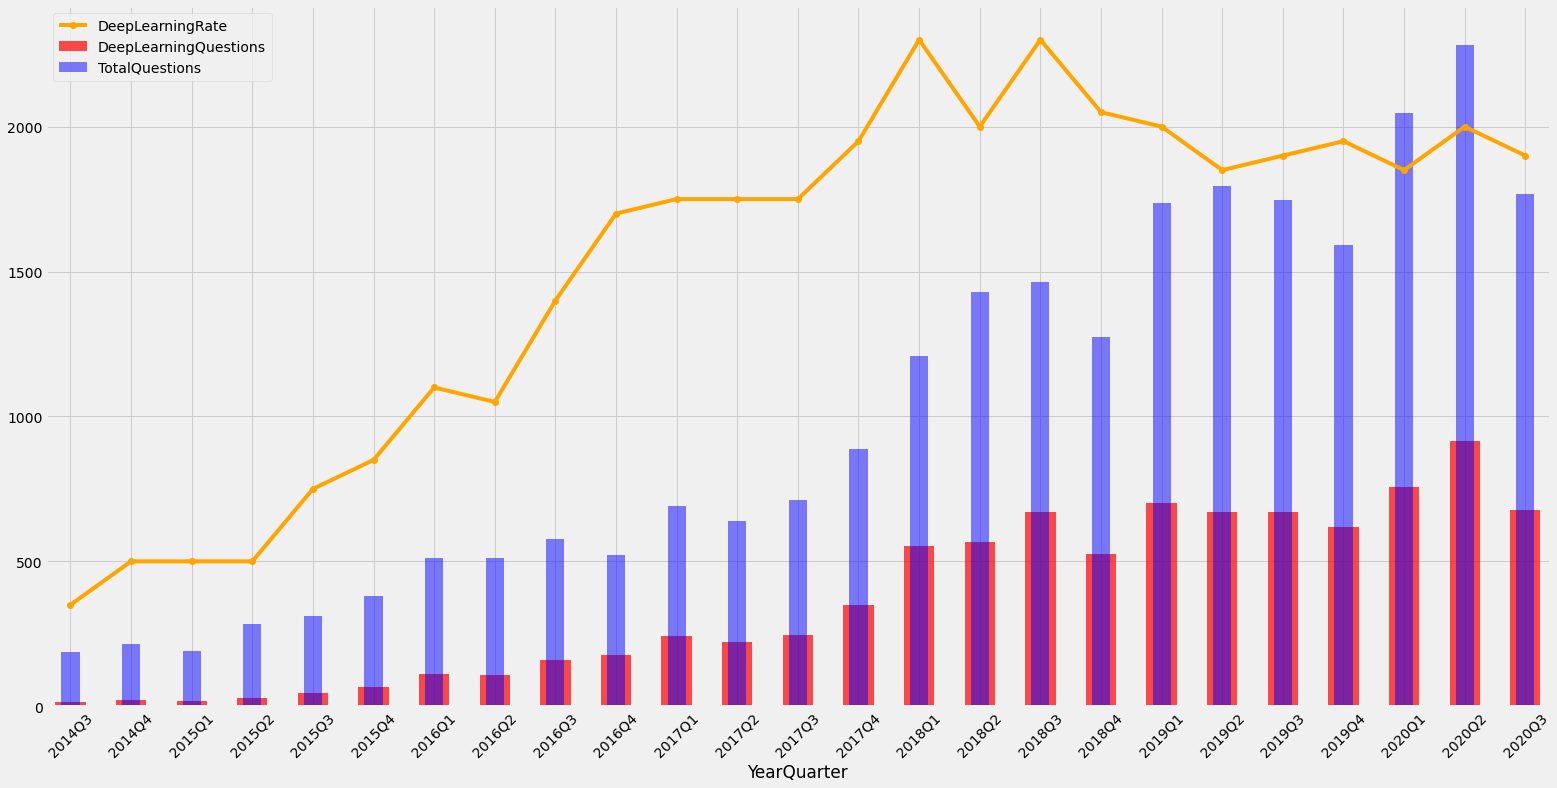

In [29]:
from matplotlib import pyplot as plt 
%matplotlib inline

plt.style.use('fivethirtyeight')

# Multiple the deep learning rate by 5,000 so it fits on the plot
q_qtr['DeepLearningRate'] = q_qtr['dl_rate'] * 5000

# Deep Learning Rate - Line Graph
ax1 = q_qtr.plot(x='YearQuarter', y='DeepLearningRate',
                 kind='line', linestyle="-", marker="o", 
                 color="orange", figsize=(24,12))

# Deep Learning questions - Bar Plot
ax2 = q_qtr.plot(x='YearQuarter', y='DeepLearningQuestions',
                 kind="bar", color='red', width=0.5,
                 ax=ax1, alpha=0.7, rot=45)

# Total questions - Bar Plot
ax3 = q_qtr.plot(x='YearQuarter', y='TotalQuestions',
                 kind="bar", color='blue', width=0.3,
                 ax=ax1, alpha=0.5, rot=45)


Deep learning questions was on a growth trend until 2019, where it appears to have plateauing.  The plateau indicates that this topic appears to be sticking around for a while and is not a fad.

## <font color='blue'> CONCLUSION </font>

The primary goal of this project was to determine the most popular data science questions on Data Science Stack Exchange, DSSE, so that a company could focus it's content on that area.  In analyzing 2019 posts in DSSE, the tags were counted and the most viewed tags in questions were:  machine learning, python, deep learning, neural network, and keras.  Also, the number of views by tag were counted, and the top five tags were:  python, machine learning, pandas, keras, deep learning.  Although, both lists are similar, the latter is thought to provide a more dependable answer to the question of the most popular questions.

Deep learning was in the top five for both previous tag counts.  In order for a company to commit time and resources to creating deep learning material, it is helpful to know whether the topic is just a transient fad or will be a common topic for some time.  In looking at data from 2014 through 2020, the trend was increasing interest in this topic until 2019, then the curve appears to flatten.  The flattening of the curve indicates interest in the topic is stable (neither decreasing or increasing).  Therefore, it appears that deep learning is not just a fad and would be a good topic for a company to invest time and money into developing product focused on deep learning.